In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [201]:
data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,
2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,
1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,
5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,
1047,965,943,958,971,949,884,866,876,822,704,719]}
df = pd.DataFrame(data)

In [202]:
interest_rate = np.array(df['interest_rate'])
index_price = np.array(df['index_price'])
unemployment_rate = np.array(df['unemployment_rate'])

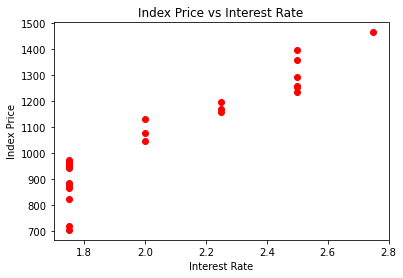

In [203]:
plt.scatter(interest_rate, index_price, color = 'red')
plt.title('Index Price vs Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

In [204]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
interest_rate, index_price, random_state=42)

print(train_input.shape, test_input.shape)

train_input = train_input.reshape(-1, 1) 
test_input = test_input.reshape(-1, 1) 

print(train_input.shape, test_input.shape)

(18,) (6,)
(18, 1) (6, 1)


In [205]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors= 4)
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.825674758006796
0.62182963839436


[574.45637584] -127.38255033557084


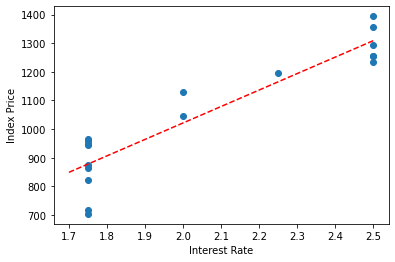

In [206]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.coef_, lr.intercept_)
plt.scatter(train_input, train_target)

plt.plot([1.7, 2.5], [1.7*lr.coef_ + lr.intercept_, 2.5*lr.coef_ + lr.intercept_],
color='red', linestyle='--')

plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

In [207]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(18, 2) (6, 2)


In [208]:
lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)

[-524.84946237 2802.42473118] -2429.1028225806517


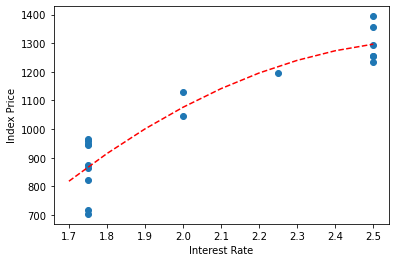

In [209]:
point= np.arange(1.7, 2.6, 0.1)
plt.scatter(train_input, train_target)

plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_,
color='red', linestyle='--')

plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

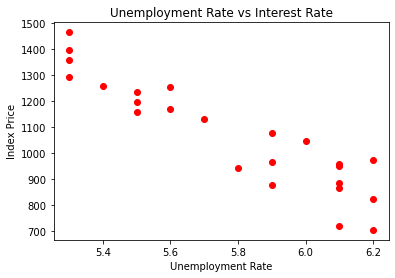

In [210]:
plt.scatter(unemployment_rate, index_price, color = 'red')
plt.title('Unemployment Rate vs Interest Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.show()

In [211]:
train_input, test_input, train_target, test_target = train_test_split(
unemployment_rate, index_price, random_state=42)

print(train_input.shape, test_input.shape)

train_input = train_input.reshape(-1, 1) 
test_input = test_input.reshape(-1, 1) 

print(train_input.shape, test_input.shape)

(18,) (6,)
(18, 1) (6, 1)


In [212]:
knr = KNeighborsRegressor(n_neighbors= 4)
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.8890073588170302
0.7378346733469314


[-611.41330166] 4586.05463182898


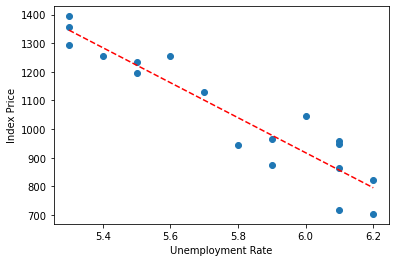

In [213]:
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.coef_, lr.intercept_)
plt.scatter(train_input, train_target)

plt.plot([5.3, 6.2], [5.3*lr.coef_ + lr.intercept_, 6.2*lr.coef_ + lr.intercept_],
color='red', linestyle='--')

plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.show()

In [214]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(18, 2) (6, 2)


In [215]:
lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)

[  -7.26428138 -527.97932022] 4347.248197109266


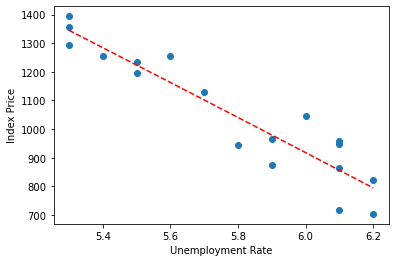

In [216]:
point= np.arange(5.3, 6.2, 0.1)
plt.scatter(train_input, train_target)

plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_,
color='red', linestyle='--')

plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.show()